In [1]:
# -----------------------------------------------------------------------
# author: Huang Jintao
# date: 2020-5-10
#
# 该文件功能:
# 1. 空间单车使用活度图(abs(in)+abs(out))
# 2. 空间单车使用活度图画网格(为调度时使用)
# -----------------------------------------------------------------------


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 中文字体环境设置
# plt.rcParams['font.sans-serif'].insert(0, 'SimSun')
# plt.rcParams['axes.unicode_minus'] = False

start_out, end_in = pd.read_pickle("files/start_out.pkl"), pd.read_pickle("files/end_in.pkl")
# 纬度范围: [39.66, 40.17]. 精确范围: [39.66133117675781 40.17082214355469]
# 经度范围: [116.06, 116.73]. 精确范围: [116.06025695800781 116.73042297363281]
(top, bottom), (left, right) = (39.66133117675781, 40.17082214355469), (116.06025695800781, 116.73042297363281)

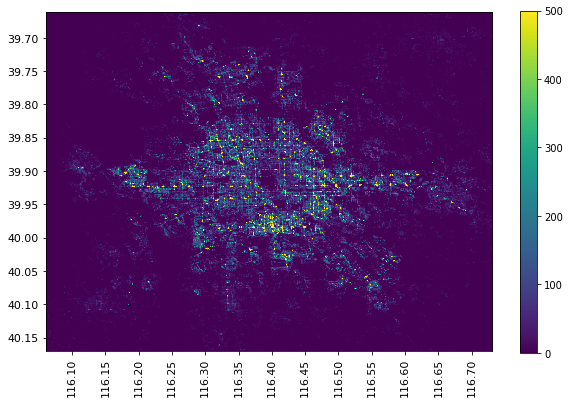

In [3]:
# 1. 空间单车使用活度图(abs(in)+abs(out))
plt.figure(figsize=(10, 7))
z = np.sum(np.abs(start_out) + np.abs(end_in), axis=-1)
# 1.1 axes设置
plt.xticks(np.arange(116.0, 116.8, 0.05), fontsize=11, rotation=90)  # range(0, 32)
plt.yticks(np.arange(39.6, 40.2, 0.05), fontsize=11)  # range(0, 32)
# 1.2 画图
plt.imshow(z, origin="lower", vmin=0, vmax=500, extent=(left, right, bottom, top))
plt.colorbar(shrink=0.9)
plt.savefig("images/空间使用活度图.png", dpi=500, bbox_inches='tight')
plt.show()
plt.close()


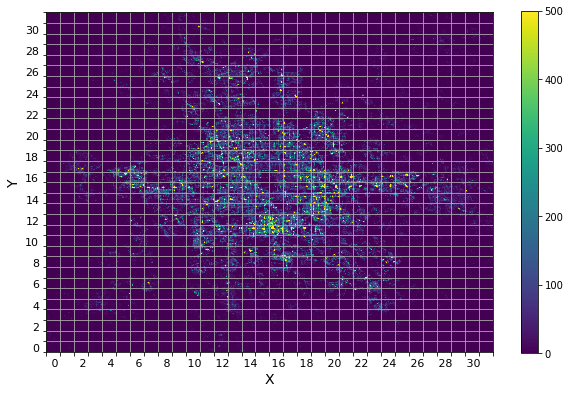

In [4]:
# 2. 空间单车使用活度图画网格(为调度时使用 32 * 32)
plt.figure(figsize=(10, 7))
z = np.sum(np.abs(start_out) + np.abs(end_in), axis=-1)
# 1.1 axes设置

labels_x = [("     " + str(i)) if i % 2 == 0 else "" for i in range(32)]

labels_y = [("\n" + str(i)) if i % 2 == 0 else "" for i in range(-1, 32)]

plt.xticks(np.linspace(left, right, 33), labels_x, fontsize=11)  # range(0, 32)
plt.yticks(np.linspace(bottom, top, 33), labels_y, fontsize=11)  # range(0, 32)
plt.xlim(left, right)
plt.ylim(bottom, top)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.grid()

# 1.2 画图
plt.imshow(z, origin="lower", vmin=0, vmax=500, extent=(left, right, bottom, top))
plt.colorbar(shrink=0.9)
plt.savefig("images/空间使用活度图_网格.png", dpi=500, bbox_inches='tight')
plt.show()
plt.close()
